# About Dataset

This dataset have 5000 row and 14 columns and personal Loan is target. other features are:
- id : Customer ID
- age : Customer's age in completed years
- experience : years of professional experience
- income : Annual income of the customer
- zip_code : Home Address ZIP code.
- family : Family size of the customer
- ccavg : Avg. spending on credit cards per month
- education : Education Level--> Undergrad,Graduate,Advanced/Professional
- mortgage : Value of house mortgage if any.
- personal_loan : Did this customer accept the personal loan offered in the last campaign?
- securities_account : Does the customer have a securities account with the bank?
- cd_account : Does the customer have a certificate of deposit (CD) account with the bank?
- online : Does the customer use internet banking facilities?
- creditcard : D

# import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
#import pyod

from sklearn.model_selection import train_test_split,GridSearchCV,KFold
from sklearn.metrics import f1_score,classification_report,confusion_matrix,ConfusionMatrixDisplay,recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler

#from xgboost import XGBClassifier
#from imblearn.over_sampling import SMOTE
import time
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("Bank_Personal_Loan_Modelling(1).csv")
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [ ]:
df.shape

(5000, 14)

In [ ]:
df.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [ ]:
df.query("( Experience < 0)")

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,90,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
226,227,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
315,316,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
451,452,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0
524,525,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0
536,537,25,-1,43,92173,3,2.40,2,176,0,0,0,1,0
540,541,25,-1,109,94010,4,2.30,3,314,0,0,0,1,0
576,577,25,-1,48,92870,3,0.30,3,0,0,0,0,0,1
583,584,24,-1,38,95045,2,1.70,2,0,0,0,0,1,0
597,598,24,-2,125,92835,2,7.20,1,0,0,1,0,0,1


In [ ]:
df.drop(df.query("( Experience < 0)").index,inplace=True)

In [ ]:
df.reset_index(drop=True,inplace=True)

In [ ]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


# EDA

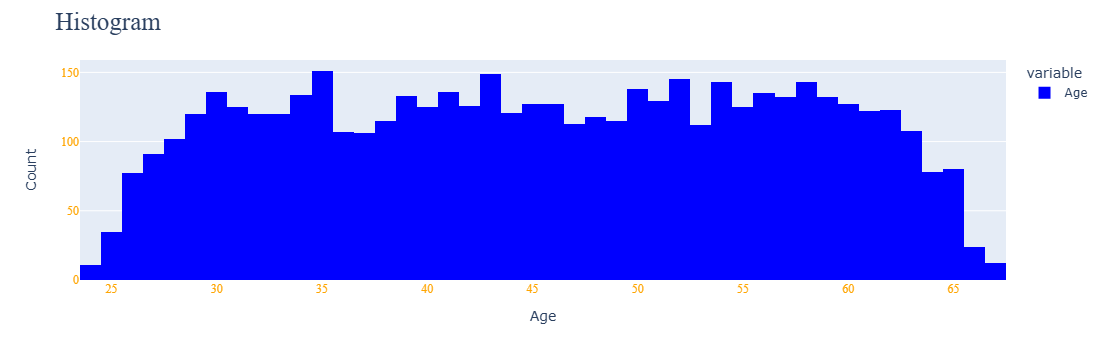

In [ ]:
fig = px.histogram(df["Age"],nbins=50,width=700,color_discrete_sequence=["blue"])

fig.update_layout(
    title=dict(text="Histogram",font_family="Serif",font_size=25),
    xaxis=dict(title="Age",tickfont_color="orange",tickfont_family="Serif"),
    yaxis=dict(title="Count",tickfont_color="orange",tickfont_family="Serif")
)

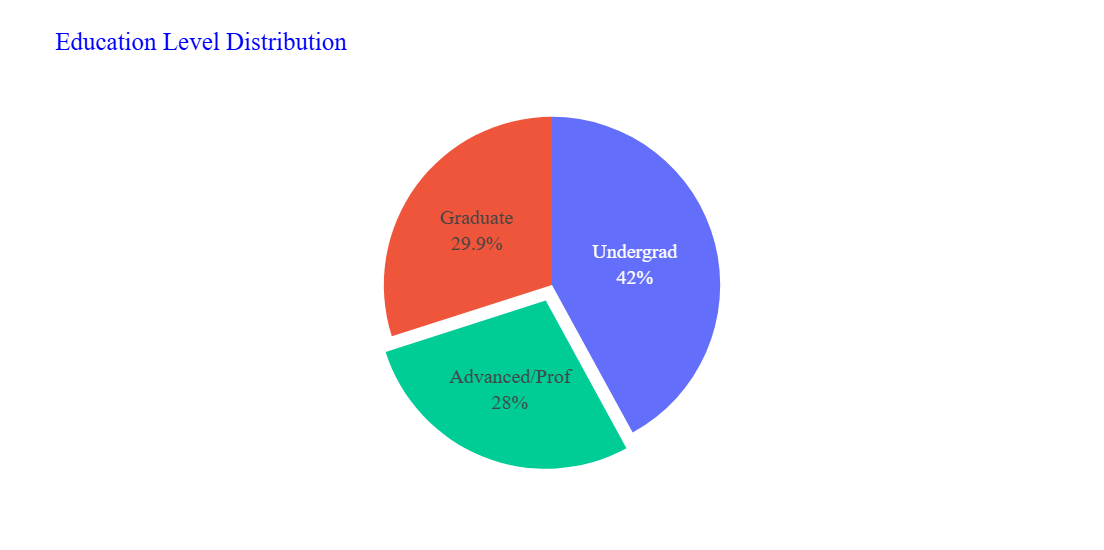

In [ ]:
data = df["Education"].value_counts()
fig = px.pie(values=data,names=["Undergrad","Graduate","Advanced/Prof"],width=600,height=550,
             title="Education Level Distribution")

fig.update_traces(
                  hoverinfo="label+percent",textfont_size=20,textinfo="label+percent",
                  textfont_family="Serif",
                  pull=[0,0,0.1])

fig.update_layout(title_font_color="blue",title_font_family="Serif",title_font_size=25,showlegend=False)

In [ ]:
data1 = df["Family"].value_counts()
data2 = df["Personal Loan"].value_counts()
data3 = df["Online"].value_counts()

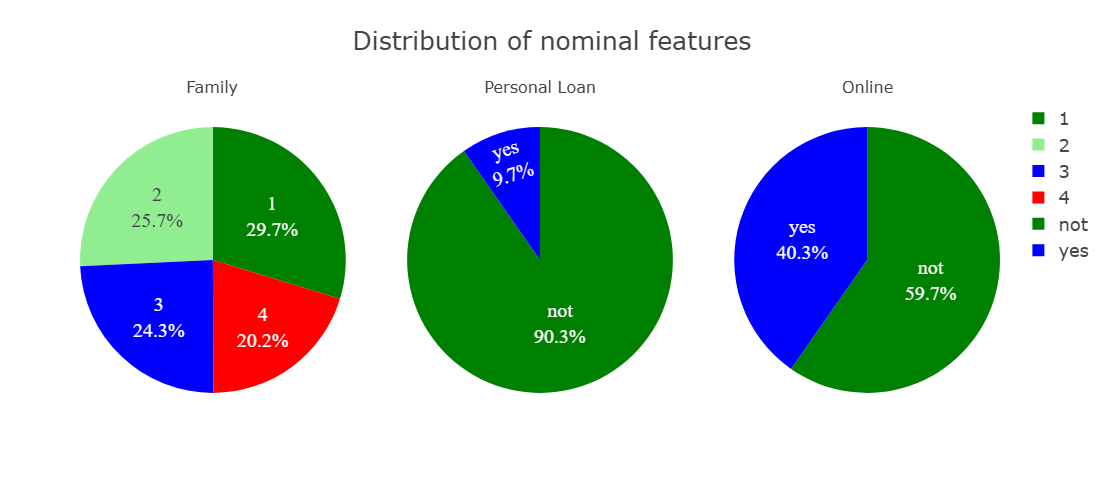

In [ ]:
fig = make_subplots(rows=1, cols=3,specs=[[{"type": "pie"},{"type": "pie"},{"type": "pie"}]],
                    subplot_titles=("Family","Personal Loan", "Online"))

fig.add_trace(go.Pie(values=data1,labels=["1","2","3","4"]),row=1,col=1)
fig.add_trace(go.Pie(values=data2,labels=["not","yes"]),row=1,col=2)
fig.add_trace(go.Pie(values=data3,labels=["not","yes"]),row=1,col=3)

fig.update_traces(marker=dict(colors=["green","blue"]),
                  hoverinfo="label+percent",textfont_size=20,textinfo="label+percent",
                  textfont_family="Serif",col=2,row=1)

fig.update_traces(marker=dict(colors=["green","blue"]),
                  hoverinfo="label+percent",textfont_size=20,textinfo="label+percent",
                  textfont_family="Serif",col=3,row=1)

fig.update_traces(marker=dict(colors=["green","lightgreen","blue","red"]),
                  hoverinfo="label+percent",textfont_size=20,textinfo="label+percent",
                  textfont_family="Serif",col=1,row=1)

fig.update_layout(
    title_text="Distribution of nominal features",template="presentation",width=1100,height=500
)

- we have imbalanced data

In [ ]:
df["Personal Loan"].value_counts(normalize=True)

Personal Loan
0    0.902991
1    0.097009
Name: proportion, dtype: float64

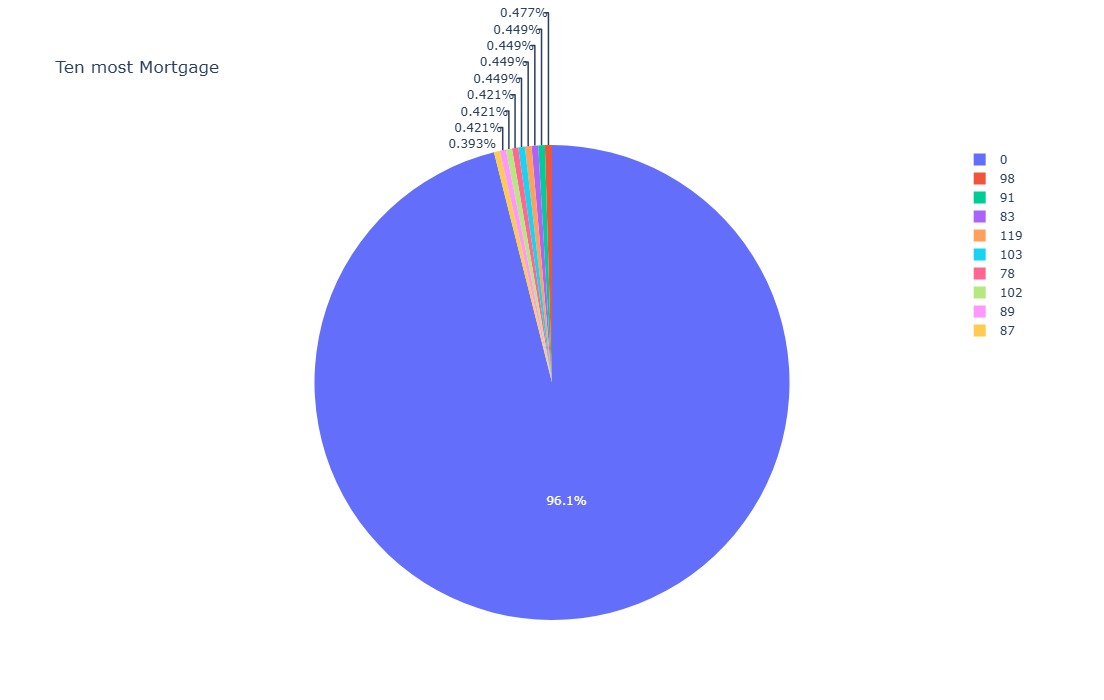

In [ ]:
data = df["Mortgage"].value_counts()[:10]
fig = px.pie(data_frame=data,values=data,names=data.index,width=700,title="Ten most Mortgage",height=700)
fig

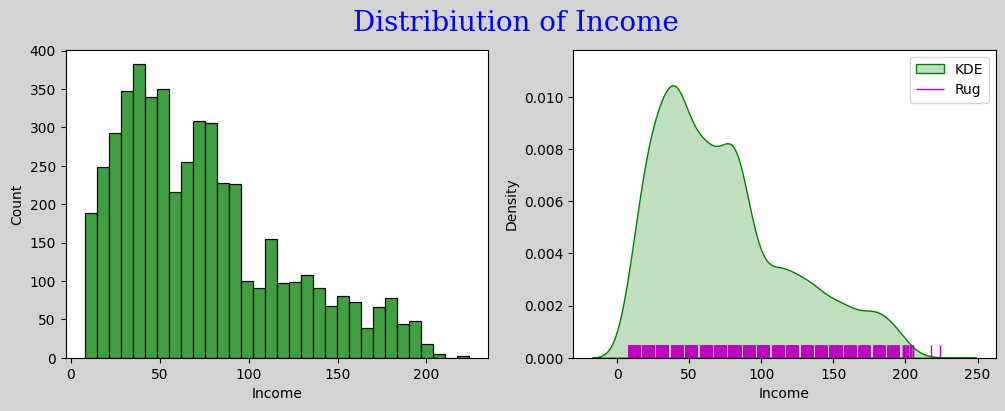

In [ ]:
fig , ax = plt.subplots(1,2,figsize=(12,4),facecolor="lightgray")

sns.histplot(df["Income"],ax=ax[0],color="green")

sns.kdeplot(df["Income"],fill=True,color="green",ax=ax[1])
sns.rugplot(df["Income"],ax=ax[1],height=0.04,color="m")

ax[1].legend(["KDE","Rug"])

fig.suptitle("Distribiution of Income",color="blue",font="Serif",size=20);

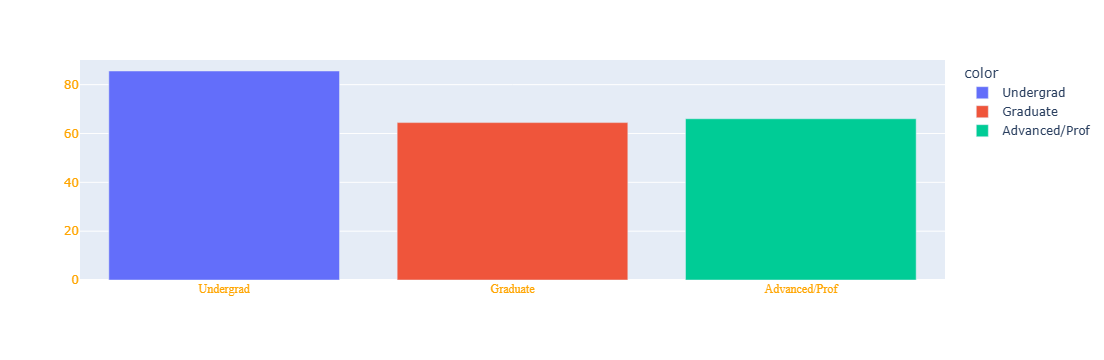

In [ ]:
data = df.groupby("Education")["Income"].mean()
index = ["Undergrad","Graduate","Advanced/Prof"]

fig = px.bar(data_frame=df,x=data.index,y=data.values,width=700,color=index)
fig.update_layout(xaxis=dict(tickvals=data.index,ticktext=index,
                             tickfont_color="orange",tickfont_family="Serif",title=dict(text="Education",font_family="Serif",
                                                                                     font_size=20,font_color="white")),

                  yaxis=dict(tickfont_color="orange",title=dict(text="Mean of Income",font_color="white",
                                                                font_family="Serif",font_size=20)),
                title = dict(text="Bar Chart",font_color="white",font_family="Serif",font_size=25))
fig.update_coloraxes(showscale=False)

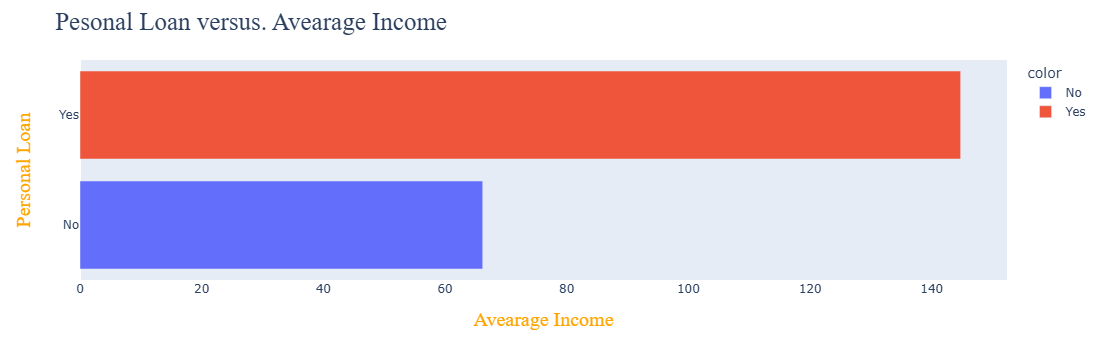

In [ ]:
data = df.groupby("Personal Loan")["Income"].mean()
fig = px.bar(data_frame=df,x=data.values,y=data.index,orientation="h",width=700,color=["No","Yes"])
fig.update_coloraxes(showscale=False)

fig.update_layout(
    title = "Pesonal Loan versus. Avearage Income",titlefont_family="Serif",titlefont_size=25,
    yaxis = dict(tickvals = data.index,ticktext=["No","Yes"],title="Personal Loan",
                 titlefont_color="orange",titlefont_family="Serif",titlefont_size=20),
    xaxis= dict(
        title=dict(text="Avearage Income",font_color="orange",font_family="Serif",font_size=20),
        showgrid=False
    )
)

In [ ]:
test = pd.DataFrame(df.groupby(["Personal Loan","Family"])["Income"].mean())
test

Income
Personal Loan Family            
0             1        73.511372
              2        78.496575
              3        54.794931
              4        52.679139
1             1       143.392523
              2       146.981132
              3       147.097744
              4       141.723881

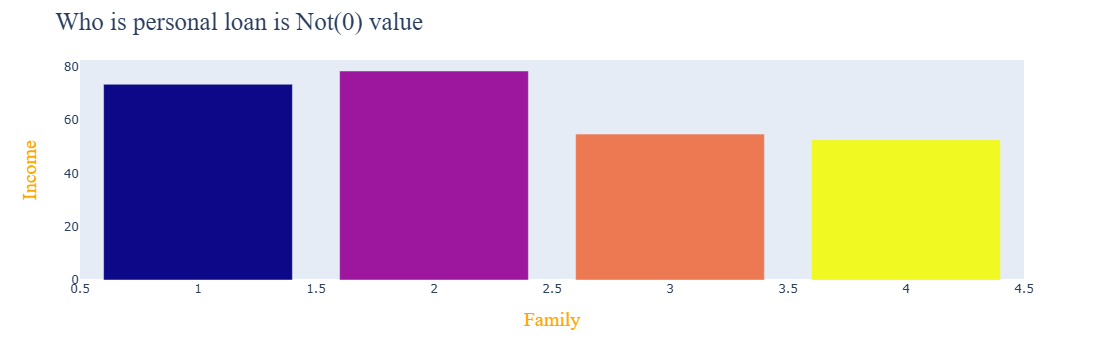

In [ ]:
no_loan = df[df["Personal Loan"] == 0].groupby("Family")["Income"].mean()

fig = px.bar(data_frame=df,x=no_loan.index,y=no_loan.values,color=[1,2,3,4],width=700)
fig.update_coloraxes(showscale=False)

fig.update_layout(
    title = dict(
        text = "Who is personal loan is Not(0) value",font_family="Serif",font_size=25
    ),

    xaxis = dict(
        title = dict(
            text="Family",font_family="Serif",font_size=20,font_color="orange"
        )
    ),

    yaxis = dict(
        title = dict(
            text="Income",font_family="Serif",font_size=20,font_color="orange"
        ),
        showgrid=False
    )
)

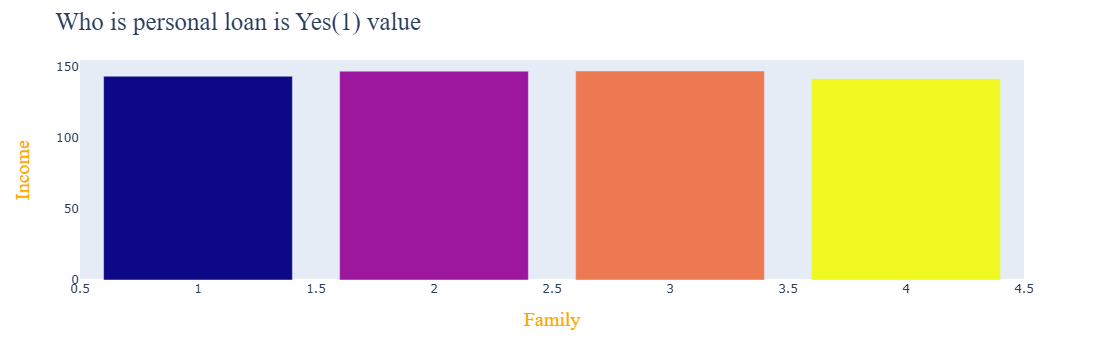

In [ ]:
yes_loan = df[df["Personal Loan"] == 1].groupby("Family")["Income"].mean()

fig = px.bar(data_frame=df,x=yes_loan.index,y=yes_loan.values,color=[1,2,3,4],width=700)
fig.update_coloraxes(showscale=False)

fig.update_layout(
    title = dict(
        text = "Who is personal loan is Yes(1) value",font_family="Serif",font_size=25
    ),

    xaxis = dict(
        title = dict(
            text="Family",font_family="Serif",font_size=20,font_color="orange"
        )
    ),

    yaxis = dict(
        title = dict(
            text="Income",font_family="Serif",font_size=20,font_color="orange"
        ),
        showgrid=False
    )
)

In [ ]:
pd.crosstab(df["Personal Loan"],df["Online"])

Online,0,1
Personal Loan,,
0,1805,2663
1,189,291


In [ ]:
df.groupby("Personal Loan")["CCAvg"].mean()

Personal Loan
0    1.724349
1    3.905354
Name: CCAvg, dtype: float64

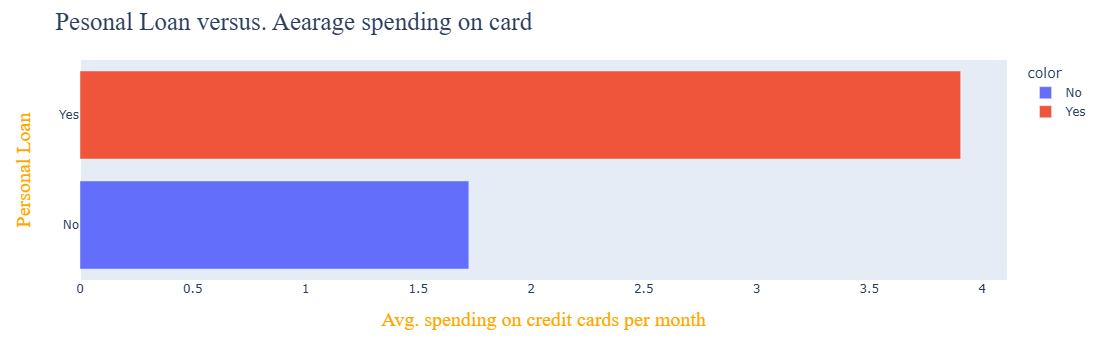

In [ ]:
data = df.groupby("Personal Loan")["CCAvg"].mean()
fig = px.bar(data_frame=df,x=data.values,y=data.index,orientation="h",width=700,color=["No","Yes"])
fig.update_coloraxes(showscale=False)

fig.update_layout(
    title = "Pesonal Loan versus. Aearage spending on card",titlefont_family="Serif",titlefont_size=25,
    yaxis = dict(tickvals = data.index,ticktext=["No","Yes"],title="Personal Loan",
                 titlefont_color="orange",titlefont_family="Serif",titlefont_size=20),
    xaxis= dict(
        title=dict(text="Avg. spending on credit cards per month",font_color="orange",font_family="Serif",font_size=20),
        showgrid=False
    )
)

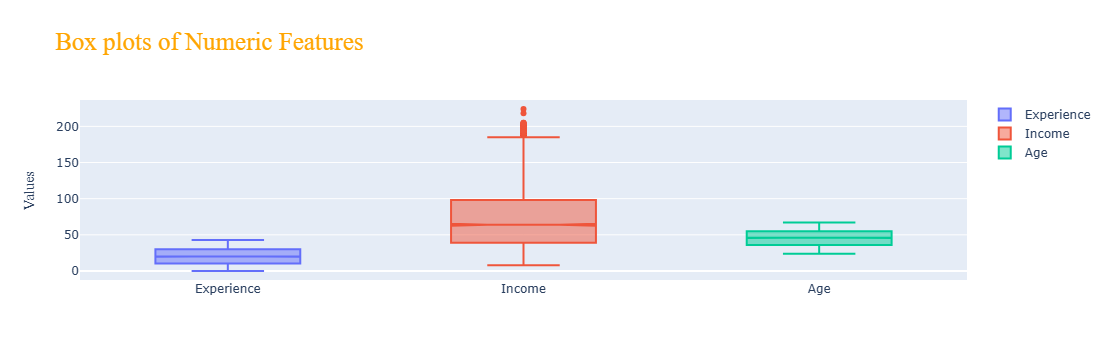

In [ ]:
fig = go.Figure()
fig.add_trace(go.Box(y=df["Experience"],name="Experience",notched=True))
fig.add_trace(go.Box(y=df["Income"],name="Income",notched=True))
fig.add_trace(go.Box(y=df["Age"],name="Age",notched=True))

fig.update_layout(
    title =dict(
        text="Box plots of Numeric Features",font_color="orange",font_family="Serif",font_size=25
    ),
    yaxis= dict(
        title="Values",titlefont_family="Serif"
    ),
    width=800,

)

- the Income Feature has outliers

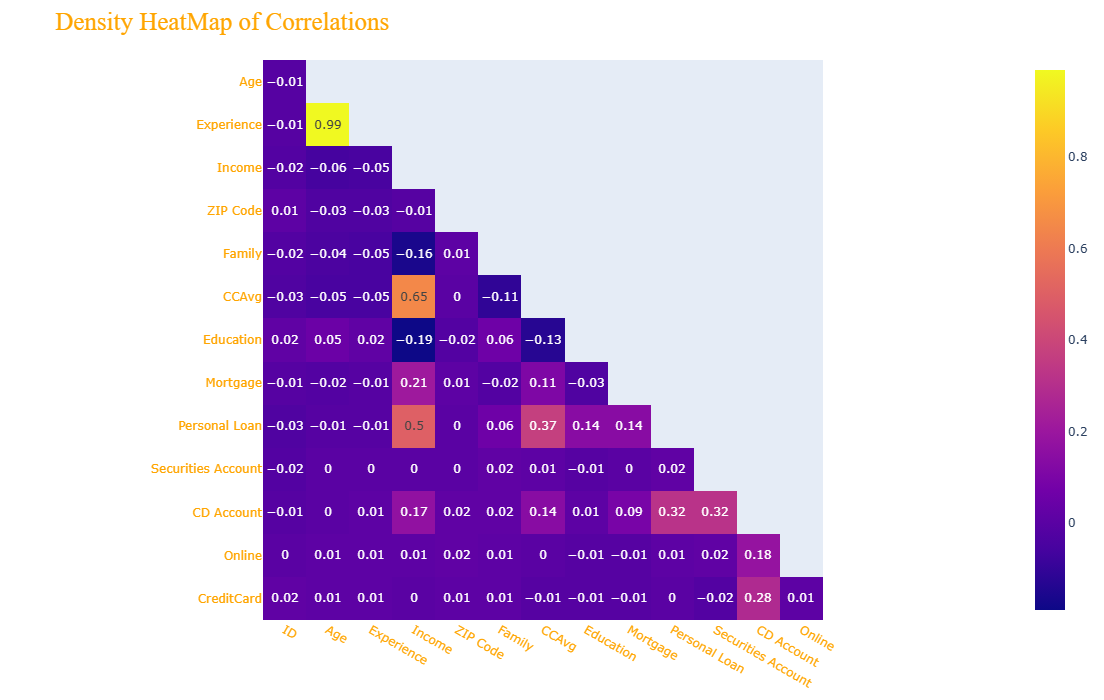

In [ ]:
df_corr = df.corr().round(2)
# Mask to matrix
mask = np.zeros_like(df_corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
# Viz
df_corr_viz = df_corr.mask(mask).dropna(how='all').dropna(axis='columns', how='all')
fig = px.imshow(df_corr_viz, text_auto=True,width=900,height=700)
fig.update_layout(
    title = dict(
        text = "Density HeatMap of Correlations",font_color="orange",font_size=25,font_family="Serif"
    ),
    xaxis=dict(
        showgrid=False,tickfont_color="orange"
    ),
    yaxis=dict(
        showgrid=False,tickfont_color="orange"
    )
)

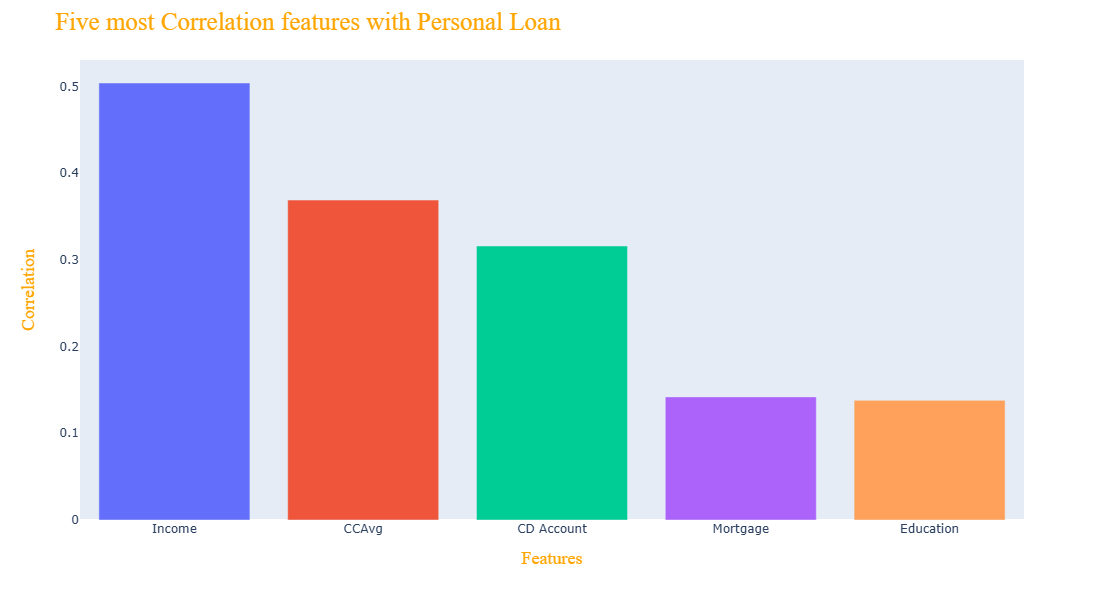

In [ ]:
data = df.corr()["Personal Loan"].round(3).sort_values(ascending=False)[1:6]

fig = px.bar(data_frame=data,x=data.index,y=data.values,color=data.index,width=700,height=600)

fig.update_layout(
    title = dict(
        text="Five most Correlation features with Personal Loan",font_color="orange",
        font_family="Serif",font_size=25
    ),
    yaxis = dict(
        title = dict(text = "Correlation",font_color="orange",font_size=18,font_family="Serif"),
        showgrid=False
    ),
    xaxis = dict(
        title = dict(text = "Features",font_color="orange",font_size=18,font_family="Serif")
    ),
    showlegend=False
)

# Data Preprocessing

we have two challenges:

- 1) detecting outliers and drop them
- 2) handling imbalanced data

- Note: before handling imbalanced data we first split before

### 1) detection Outliers

- firs lets go detecting outliers by `pyod` and `hard codeing`
- if you want more about `LOF` method click buttom link
- I selected method with `IQR` method and firstI define a func and apply to `Income feature`

[LOF Source Link](https://pyod.readthedocs.io/en/latest/pyod.models.html#pyod.models.lof.LOF)

In [ ]:
#from pyod.models.lof import LOF
#lof = LOF().fit(np.array(df["Income"]).reshape(-1,1))
#outliers = lof.predict(np.array(df["Income"]).reshape(-1,1))

In [ ]:
def IQR(data,treshold=1.5):
    q1 = np.percentile(data,25)
    q3 = np.percentile(data,75)

    iqr = q3 - q1

    lower = q1 - treshold * iqr
    upper = q3 + treshold * iqr

    return lower , upper

In [ ]:
# removing outliers by IQR method

lower_income, upper_income = IQR(df["Income"])

# beacuse we dont have negative values for this columns
# therefor we did not calculate the lower limit
print(f"Upper limit for Income:{upper_income}")

Upper limit for Income:186.5


- we have 96 outliers

In [ ]:
df[df["Income"] > upper_income]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
18,19,46,21,193,91604,2,8.10,3,0,1,0,0,0,0
47,48,37,12,194,91380,4,0.20,3,211,1,1,1,1,1
53,54,50,26,190,90245,3,2.10,3,240,1,0,0,1,0
59,60,31,5,188,91320,2,4.50,1,455,0,0,0,0,0
301,304,49,25,195,95605,4,3.00,1,617,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4608,4660,28,4,199,92121,1,6.33,1,0,0,0,0,0,0
4619,4671,52,26,194,94305,1,1.70,1,0,0,0,0,1,0
4844,4896,45,20,201,92120,2,2.80,1,0,0,0,0,1,1
4929,4982,34,9,195,90266,2,3.00,1,122,0,0,0,1,0


In [ ]:
df = df.query(f"Income < {upper_income}")
df.shape

(4852, 14)

- it was successful

In [ ]:
df[df["Income"] > upper_income]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


### 2)Split data

In [ ]:
# check for null values
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [ ]:
# drop ID column
df.drop(["ID","ZIP Code"],axis="columns",inplace=True)

In [ ]:
# we reset index because we droped outliers and index needs to be reset
df.reset_index(drop=True,inplace=True)

In [ ]:
x = df.drop("Personal Loan",axis="columns")
y = df["Personal Loan"]

In [ ]:
import numpy as np

# ---------------- Manual oversampling function ----------------
def oversample(x, y):
    unique, counts = np.unique(y, return_counts=True)
    max_count = max(counts)
    x_res, y_res = [], []

    for cls in unique:
        x_cls = x[y == cls]
        y_cls = y[y == cls]
        reps = max_count // len(x_cls)
        rem = max_count % len(x_cls)
        x_res.append(np.tile(x_cls, (reps, 1)))
        y_res.append(np.tile(y_cls, reps))
        if rem > 0:
            x_res.append(x_cls[:rem])
            y_res.append(y_cls[:rem])

    x_res = np.vstack(x_res)
    y_res = np.hstack(y_res)

    # Shuffle
    idx = np.arange(len(x_res))
    np.random.shuffle(idx)
    return x_res[idx], y_res[idx]

# ---------------- Apply oversampling ----------------
# x and y contain your original dataset
x_bal, y_bal = oversample(x, y)

# ---------------- Separate for model training ----------------
x = x_bal
y = y_bal

# Optional: check new class counts
unique, counts = np.unique(y, return_counts=True)
print("Balanced class counts:", dict(zip(unique, counts)))


Balanced class counts: {0: 4414, 1: 4414}


In [ ]:
import pandas as pd

y_series = pd.Series(y)
print(y_series.value_counts())

0    4414
1    4414
Name: count, dtype: int64


In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y_series,train_size=0.8,random_state=42)

the best model is `Gradient Boosting` and after it `XGBoosting`

Round 1: Loss=0.4108, Accuracy=0.8375
Round 2: Loss=0.3976, Accuracy=0.8431
Round 3: Loss=0.4442, Accuracy=0.8381
Round 4: Loss=0.5082, Accuracy=0.8131
Round 5: Loss=0.3576, Accuracy=0.8522
Round 6: Loss=0.3115, Accuracy=0.8783
Round 7: Loss=0.4125, Accuracy=0.8347
Round 8: Loss=0.2561, Accuracy=0.8924
Round 9: Loss=0.2669, Accuracy=0.8828
Round 10: Loss=0.2658, Accuracy=0.8811
Round 11: Loss=0.2258, Accuracy=0.9139
Round 12: Loss=0.2291, Accuracy=0.9117
Round 13: Loss=0.2033, Accuracy=0.9258
Round 14: Loss=0.1981, Accuracy=0.9287
Round 15: Loss=0.2378, Accuracy=0.8958
Round 16: Loss=0.1828, Accuracy=0.9377
Round 17: Loss=0.1850, Accuracy=0.9394
Round 18: Loss=0.1833, Accuracy=0.9247
Round 19: Loss=0.1802, Accuracy=0.9287
Round 20: Loss=0.1717, Accuracy=0.9304

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.91      0.93       904
           1       0.91      0.96      0.93       862

    accuracy                           0

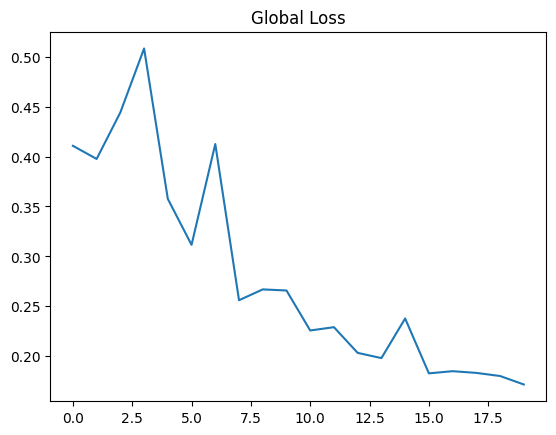

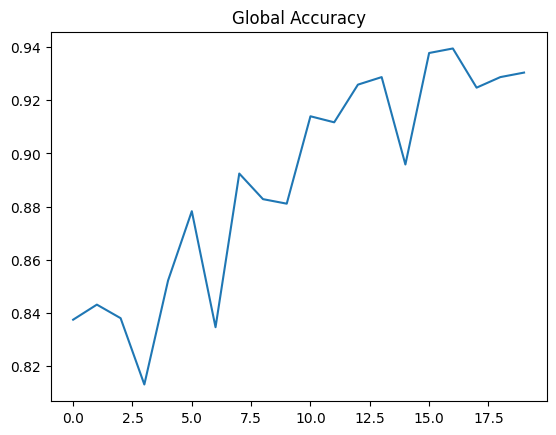

In [ ]:
import numpy as np, tensorflow as tf, matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, clone_model
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix

# -----------------------------
# 1. Split data into clients
# -----------------------------
def split_clients(X, y, n_clients=5):
    idx = np.arange(len(X)); np.random.shuffle(idx)
    return [(X[s], y[s]) for s in np.array_split(idx, n_clients)]

# -----------------------------
# 2. Build 1D CNN
# -----------------------------
def build_1dcnn(input_shape, n_classes):
    model = Sequential([
        Conv1D(32, 3, activation='relu', input_shape=input_shape),
        MaxPooling1D(2),
        Conv1D(64, 3, activation='relu'),
        MaxPooling1D(2),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(n_classes, activation='softmax')
    ])
    model.compile(optimizer=Adam(0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# -----------------------------
# 3. FedAvg aggregation
# -----------------------------
def fedavg(global_model, local_models, sizes):
    total = np.sum(sizes)
    new_weights = [sum(w*s for w, s in zip(ws, sizes)) / total
                   for ws in zip(*[m.get_weights() for m in local_models])]
    global_model.set_weights(new_weights)
    return global_model

# -----------------------------
# 4. FedAvg training + metrics
# -----------------------------
def model_fedavg_1dcnn(xtrain, ytrain, xtest, ytest, n_clients=5, rounds=5, epochs=1):

    # Convert DataFrames/Series to NumPy arrays
    xtrain = xtrain.to_numpy() if hasattr(xtrain, "to_numpy") else np.array(xtrain)
    xtest  = xtest.to_numpy()  if hasattr(xtest, "to_numpy") else np.array(xtest)
    ytrain = ytrain.to_numpy() if hasattr(ytrain, "to_numpy") else np.array(ytrain)
    ytest  = ytest.to_numpy()  if hasattr(ytest, "to_numpy") else np.array(ytest)

    # Reshape to 3D for Conv1D
    xtrain = xtrain.reshape(xtrain.shape[0], xtrain.shape[1], 1)
    xtest  = xtest.reshape(xtest.shape[0], xtest.shape[1], 1)

    clients = split_clients(xtrain, ytrain, n_clients)
    global_model = build_1dcnn(xtrain.shape[1:], len(np.unique(ytrain)))
    global_loss, global_acc = [], []

    for r in range(rounds):
        local_models, sizes = [], []
        for Xc, yc in clients:
            lm = clone_model(global_model)
            lm.set_weights(global_model.get_weights())
            lm.compile(Adam(0.001), 'sparse_categorical_crossentropy', ['accuracy'])
            lm.fit(Xc, yc, epochs=epochs, batch_size=32, verbose=0)
            local_models.append(lm)
            sizes.append(len(Xc))
        global_model = fedavg(global_model, local_models, sizes)
        loss, acc = global_model.evaluate(xtest, ytest, verbose=0)
        global_loss.append(loss); global_acc.append(acc)
        print(f"Round {r+1}: Loss={loss:.4f}, Accuracy={acc:.4f}")

    y_pred = np.argmax(global_model.predict(xtest, verbose=0), axis=1)
    print("\nClassification Report:\n", classification_report(ytest, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(ytest, y_pred))
    print("\nGlobal Loss per Round:", global_loss)
    print("Global Accuracy per Round:", global_acc)

    plt.figure(); plt.plot(global_loss); plt.title("Global Loss"); plt.show()
    plt.figure(); plt.plot(global_acc); plt.title("Global Accuracy"); plt.show()

    return global_model

# ------------------ CALL FUNCTION ------------------
# Just call the function directly on your DataFrames / Series
global_model = model_fedavg_1dcnn(xtrain, ytrain, xtest, ytest, n_clients=4, rounds=20, epochs=2)


In [ ]:
Global_Loss_per_Round_CNN = [0.41075754165649414, 0.3975757360458374, 0.4442203938961029, 0.5082428455352783, 0.3575822412967682, 0.31154701113700867, 0.41252854466438293, 0.25606560707092285, 0.2669066786766052, 0.2658120393753052, 0.22576192021369934, 0.2290664166212082, 0.20331567525863647, 0.19809497892856598, 0.23775885999202728, 0.182822585105896, 0.1849832832813263, 0.18327324092388153, 0.18015156686306, 0.17166994512081146]
Global_Accuracy_per_Round_CNN = [0.8374858498573303, 0.8431483507156372, 0.8380520939826965, 0.8131370544433594, 0.8522083759307861, 0.8782559633255005, 0.8346545696258545, 0.8924122452735901, 0.882785975933075, 0.8810871839523315, 0.9139297604560852, 0.9116647839546204, 0.92582106590271, 0.9286523461341858, 0.8958097100257874, 0.9377123713493347, 0.9394111037254333, 0.9246885776519775, 0.9286523461341858, 0.9303510785102844]

Round 1: Loss=0.3561, Accuracy=0.8296
Round 2: Loss=0.2738, Accuracy=0.8822
Round 3: Loss=0.2633, Accuracy=0.8884
Round 4: Loss=0.2574, Accuracy=0.8862
Round 5: Loss=0.2511, Accuracy=0.8918
Round 6: Loss=0.2524, Accuracy=0.8845
Round 7: Loss=0.2374, Accuracy=0.8947
Round 8: Loss=0.2442, Accuracy=0.8964
Round 9: Loss=0.2216, Accuracy=0.9054
Round 10: Loss=0.2121, Accuracy=0.9100
Round 11: Loss=0.2089, Accuracy=0.9122
Round 12: Loss=0.2110, Accuracy=0.9156
Round 13: Loss=0.1943, Accuracy=0.9207
Round 14: Loss=0.2051, Accuracy=0.9247
Round 15: Loss=0.1957, Accuracy=0.9179
Round 16: Loss=0.1962, Accuracy=0.9292
Round 17: Loss=0.1774, Accuracy=0.9332
Round 18: Loss=0.1669, Accuracy=0.9377
Round 19: Loss=0.1558, Accuracy=0.9411
Round 20: Loss=0.1618, Accuracy=0.9371

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.92      0.94       904
           1       0.92      0.96      0.94       862

    accuracy                           0

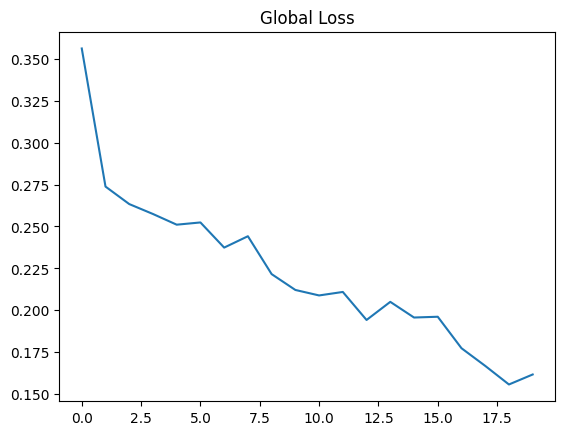

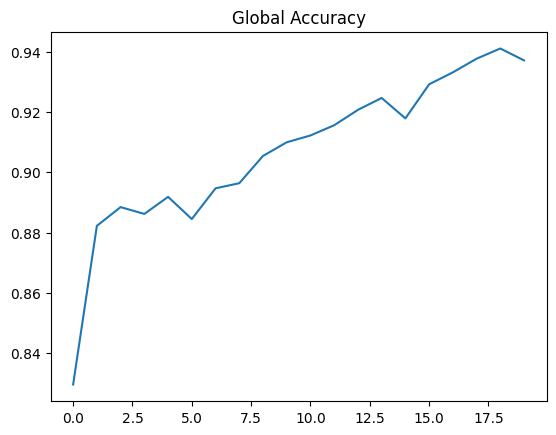

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, clone_model
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix

# -----------------------------
# 1. Split data into clients
# -----------------------------
def split_clients(X, y, n_clients=5):
    idx = np.arange(len(X)); np.random.shuffle(idx)
    return [(X[s], y[s]) for s in np.array_split(idx, n_clients)]

# -----------------------------
# 2. Build LSTM model
# -----------------------------
def build_lstm(input_shape, n_classes):
    model = Sequential([
        LSTM(64, input_shape=input_shape, return_sequences=False),
        Dense(64, activation='relu'),
        Dense(n_classes, activation='softmax')
    ])
    model.compile(optimizer=Adam(0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# -----------------------------
# 3. FedAvg aggregation
# -----------------------------
def fedavg(global_model, local_models, sizes):
    total = np.sum(sizes)
    new_weights = [sum(w*s for w, s in zip(ws, sizes)) / total
                   for ws in zip(*[m.get_weights() for m in local_models])]
    global_model.set_weights(new_weights)
    return global_model

# -----------------------------
# 4. FedAvg training + metrics
# -----------------------------
def model_fedavg_lstm(xtrain, ytrain, xtest, ytest, n_clients=5, rounds=5, epochs=1):

    # Convert to NumPy arrays if needed
    xtrain = xtrain.to_numpy() if hasattr(xtrain, "to_numpy") else np.array(xtrain)
    xtest  = xtest.to_numpy()  if hasattr(xtest, "to_numpy") else np.array(xtest)
    ytrain = ytrain.to_numpy() if hasattr(ytrain, "to_numpy") else np.array(ytrain)
    ytest  = ytest.to_numpy()  if hasattr(ytest, "to_numpy") else np.array(ytest)

    # Reshape to 3D for LSTM: (samples, timesteps, features)
    xtrain = xtrain.reshape(xtrain.shape[0], xtrain.shape[1], 1)
    xtest  = xtest.reshape(xtest.shape[0], xtest.shape[1], 1)

    clients = split_clients(xtrain, ytrain, n_clients)
    global_model = build_lstm(xtrain.shape[1:], len(np.unique(ytrain)))
    global_loss, global_acc = [], []

    for r in range(rounds):
        local_models, sizes = [], []
        for Xc, yc in clients:
            lm = clone_model(global_model)
            lm.set_weights(global_model.get_weights())
            lm.compile(Adam(0.001), 'sparse_categorical_crossentropy', ['accuracy'])
            lm.fit(Xc, yc, epochs=epochs, batch_size=32, verbose=0)
            local_models.append(lm)
            sizes.append(len(Xc))
        global_model = fedavg(global_model, local_models, sizes)
        loss, acc = global_model.evaluate(xtest, ytest, verbose=0)
        global_loss.append(loss); global_acc.append(acc)
        print(f"Round {r+1}: Loss={loss:.4f}, Accuracy={acc:.4f}")

    y_pred = np.argmax(global_model.predict(xtest, verbose=0), axis=1)
    print("\nClassification Report:\n", classification_report(ytest, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(ytest, y_pred))
    print("\nGlobal Loss per Round:", global_loss)
    print("Global Accuracy per Round:", global_acc)

    plt.figure(); plt.plot(global_loss); plt.title("Global Loss"); plt.show()
    plt.figure(); plt.plot(global_acc); plt.title("Global Accuracy"); plt.show()

    return global_model

# ------------------ CALL FUNCTION ------------------
global_model = model_fedavg_lstm(xtrain, ytrain, xtest, ytest, n_clients=4, rounds=20, epochs=2)


In [ ]:
Global_Loss_per_Round_LSTM = [0.3560998737812042, 0.2737772464752197, 0.2633494436740875, 0.25742992758750916, 0.2510591745376587, 0.2523919343948364, 0.23739886283874512, 0.24417370557785034, 0.22159942984580994, 0.21214759349822998, 0.2088783234357834, 0.2109588086605072, 0.19425390660762787, 0.20505575835704803, 0.1957160383462906, 0.19617533683776855, 0.17741666734218597, 0.16688503324985504, 0.15580090880393982, 0.16175878047943115]
Global_Accuracy_per_Round_LSTM = [0.8295583128929138, 0.8822197318077087, 0.8884484767913818, 0.8861834406852722, 0.8918460011482239, 0.8844847083091736, 0.8946772217750549, 0.8963760137557983, 0.9054360389709473, 0.9099660515785217, 0.9122310280799866, 0.9156285524368286, 0.9207248091697693, 0.9246885776519775, 0.9178935289382935, 0.929218590259552, 0.9331823587417603, 0.9377123713493347, 0.941109836101532, 0.9371460676193237]

Round 1: Loss=0.3199, Accuracy=0.8664
Round 2: Loss=0.2666, Accuracy=0.8890
Round 3: Loss=0.2604, Accuracy=0.8981
Round 4: Loss=0.2513, Accuracy=0.8998
Round 5: Loss=0.2446, Accuracy=0.8935
Round 6: Loss=0.2299, Accuracy=0.9049
Round 7: Loss=0.2203, Accuracy=0.9071
Round 8: Loss=0.2092, Accuracy=0.9117
Round 9: Loss=0.2000, Accuracy=0.9156
Round 10: Loss=0.1907, Accuracy=0.9224
Round 11: Loss=0.1775, Accuracy=0.9332
Round 12: Loss=0.1798, Accuracy=0.9258
Round 13: Loss=0.1844, Accuracy=0.9207
Round 14: Loss=0.1602, Accuracy=0.9434
Round 15: Loss=0.1512, Accuracy=0.9445
Round 16: Loss=0.1610, Accuracy=0.9377
Round 17: Loss=0.1348, Accuracy=0.9468
Round 18: Loss=0.1297, Accuracy=0.9519
Round 19: Loss=0.1260, Accuracy=0.9513
Round 20: Loss=0.1174, Accuracy=0.9547

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96       904
           1       0.95      0.96      0.95       862

    accuracy                           0

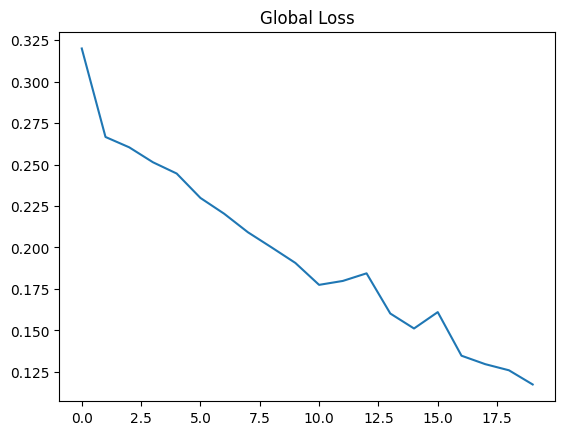

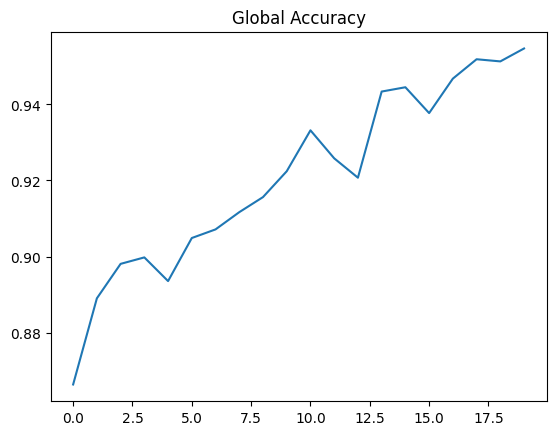

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, clone_model
from tensorflow.keras.layers import LSTM, Dense, Bidirectional
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix

# -----------------------------
# 1. Split data into clients
# -----------------------------
def split_clients(X, y, n_clients=5):
    idx = np.arange(len(X)); np.random.shuffle(idx)
    return [(X[s], y[s]) for s in np.array_split(idx, n_clients)]

# -----------------------------
# 2. Build BiLSTM model
# -----------------------------
def build_bilstm(input_shape, n_classes):
    model = Sequential([
        Bidirectional(LSTM(64, return_sequences=False), input_shape=input_shape),
        Dense(64, activation='relu'),
        Dense(n_classes, activation='softmax')
    ])
    model.compile(optimizer=Adam(0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# -----------------------------
# 3. FedAvg aggregation
# -----------------------------
def fedavg(global_model, local_models, sizes):
    total = np.sum(sizes)
    new_weights = [sum(w*s for w, s in zip(ws, sizes)) / total
                   for ws in zip(*[m.get_weights() for m in local_models])]
    global_model.set_weights(new_weights)
    return global_model

# -----------------------------
# 4. FedAvg training + metrics
# -----------------------------
def model_fedavg_bilstm(xtrain, ytrain, xtest, ytest, n_clients=5, rounds=5, epochs=1):

    # Convert to NumPy arrays if needed
    xtrain = xtrain.to_numpy() if hasattr(xtrain, "to_numpy") else np.array(xtrain)
    xtest  = xtest.to_numpy()  if hasattr(xtest, "to_numpy") else np.array(xtest)
    ytrain = ytrain.to_numpy() if hasattr(ytrain, "to_numpy") else np.array(ytrain)
    ytest  = ytest.to_numpy()  if hasattr(ytest, "to_numpy") else np.array(ytest)

    # Reshape to 3D for LSTM: (samples, timesteps, features)
    xtrain = xtrain.reshape(xtrain.shape[0], xtrain.shape[1], 1)
    xtest  = xtest.reshape(xtest.shape[0], xtest.shape[1], 1)

    clients = split_clients(xtrain, ytrain, n_clients)
    global_model = build_bilstm(xtrain.shape[1:], len(np.unique(ytrain)))
    global_loss, global_acc = [], []

    for r in range(rounds):
        local_models, sizes = [], []
        for Xc, yc in clients:
            lm = clone_model(global_model)
            lm.set_weights(global_model.get_weights())
            lm.compile(Adam(0.001), 'sparse_categorical_crossentropy', ['accuracy'])
            lm.fit(Xc, yc, epochs=epochs, batch_size=32, verbose=0)
            local_models.append(lm)
            sizes.append(len(Xc))
        global_model = fedavg(global_model, local_models, sizes)
        loss, acc = global_model.evaluate(xtest, ytest, verbose=0)
        global_loss.append(loss); global_acc.append(acc)
        print(f"Round {r+1}: Loss={loss:.4f}, Accuracy={acc:.4f}")

    y_pred = np.argmax(global_model.predict(xtest, verbose=0), axis=1)
    print("\nClassification Report:\n", classification_report(ytest, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(ytest, y_pred))
    print("\nGlobal Loss per Round:", global_loss)
    print("Global Accuracy per Round:", global_acc)

    plt.figure(); plt.plot(global_loss); plt.title("Global Loss"); plt.show()
    plt.figure(); plt.plot(global_acc); plt.title("Global Accuracy"); plt.show()

    return global_model

# ------------------ CALL FUNCTION ------------------
global_model = model_fedavg_bilstm(xtrain, ytrain, xtest, ytest, n_clients=4, rounds=20, epochs=2)


In [ ]:
Global_Loss_per_Round_BiLSTM= [0.3199301064014435, 0.26659727096557617, 0.260352224111557, 0.2513478696346283, 0.24455560743808746, 0.2298523336648941, 0.22033584117889404, 0.20917730033397675, 0.20002183318138123, 0.19068142771720886, 0.17746499180793762, 0.1798282265663147, 0.1844114065170288, 0.16020113229751587, 0.15117064118385315, 0.1610398143529892, 0.13476911187171936, 0.12967440485954285, 0.12597940862178802, 0.11742623895406723]
Global_Accuracy_per_Round_BiLSTM = [0.8663646578788757, 0.889014720916748, 0.898074746131897, 0.8997734785079956, 0.8935447335243225, 0.9048697352409363, 0.9071347713470459, 0.9116647839546204, 0.9156285524368286, 0.9224235415458679, 0.9331823587417603, 0.92582106590271, 0.9207248091697693, 0.9433748722076416, 0.944507360458374, 0.9377123713493347, 0.9467723965644836, 0.9518686532974243, 0.9513023495674133, 0.9546998739242554]

Round 1: Loss=0.4468, Accuracy=0.7911
Round 2: Loss=0.2831, Accuracy=0.8856
Round 3: Loss=0.2923, Accuracy=0.8788
Round 4: Loss=0.2488, Accuracy=0.8981
Round 5: Loss=0.2345, Accuracy=0.9066
Round 6: Loss=0.2204, Accuracy=0.9105
Round 7: Loss=0.2054, Accuracy=0.9173
Round 8: Loss=0.1973, Accuracy=0.9230
Round 9: Loss=0.2025, Accuracy=0.9173
Round 10: Loss=0.1825, Accuracy=0.9281
Round 11: Loss=0.1763, Accuracy=0.9366
Round 12: Loss=0.1655, Accuracy=0.9411
Round 13: Loss=0.1577, Accuracy=0.9422
Round 14: Loss=0.1605, Accuracy=0.9428
Round 15: Loss=0.1396, Accuracy=0.9536
Round 16: Loss=0.1320, Accuracy=0.9553
Round 17: Loss=0.1194, Accuracy=0.9581
Round 18: Loss=0.1077, Accuracy=0.9592
Round 19: Loss=0.0982, Accuracy=0.9615
Round 20: Loss=0.0981, Accuracy=0.9615

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96       904
           1       0.95      0.98      0.96       862

    accuracy                           0

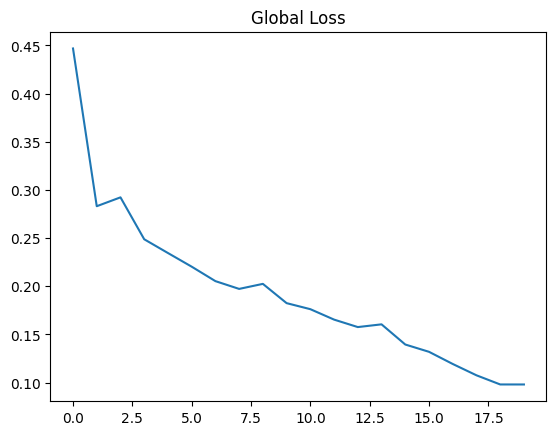

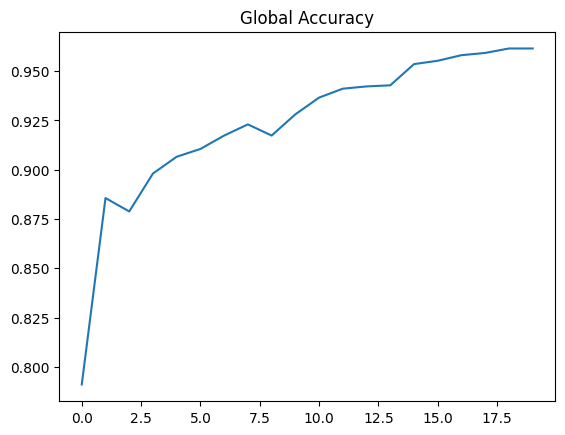

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, clone_model
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix

# -----------------------------
# 1. Split data into clients
# -----------------------------
def split_clients(X, y, n_clients=5):
    idx = np.arange(len(X)); np.random.shuffle(idx)
    return [(X[s], y[s]) for s in np.array_split(idx, n_clients)]

# -----------------------------
# 2. Build GRU model
# -----------------------------
def build_gru(input_shape, n_classes):
    model = Sequential([
        GRU(64, input_shape=input_shape, return_sequences=False),
        Dense(64, activation='relu'),
        Dense(n_classes, activation='softmax')
    ])
    model.compile(optimizer=Adam(0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# -----------------------------
# 3. FedAvg aggregation
# -----------------------------
def fedavg(global_model, local_models, sizes):
    total = np.sum(sizes)
    new_weights = [sum(w*s for w, s in zip(ws, sizes)) / total
                   for ws in zip(*[m.get_weights() for m in local_models])]
    global_model.set_weights(new_weights)
    return global_model

# -----------------------------
# 4. FedAvg training + metrics
# -----------------------------
def model_fedavg_gru(xtrain, ytrain, xtest, ytest, n_clients=5, rounds=5, epochs=1):

    # Convert to NumPy arrays if needed
    xtrain = xtrain.to_numpy() if hasattr(xtrain, "to_numpy") else np.array(xtrain)
    xtest  = xtest.to_numpy()  if hasattr(xtest, "to_numpy") else np.array(xtest)
    ytrain = ytrain.to_numpy() if hasattr(ytrain, "to_numpy") else np.array(ytrain)
    ytest  = ytest.to_numpy()  if hasattr(ytest, "to_numpy") else np.array(ytest)

    # Reshape to 3D for GRU: (samples, timesteps, features)
    xtrain = xtrain.reshape(xtrain.shape[0], xtrain.shape[1], 1)
    xtest  = xtest.reshape(xtest.shape[0], xtest.shape[1], 1)

    clients = split_clients(xtrain, ytrain, n_clients)
    global_model = build_gru(xtrain.shape[1:], len(np.unique(ytrain)))
    global_loss, global_acc = [], []

    for r in range(rounds):
        local_models, sizes = [], []
        for Xc, yc in clients:
            lm = clone_model(global_model)
            lm.set_weights(global_model.get_weights())
            lm.compile(Adam(0.001), 'sparse_categorical_crossentropy', ['accuracy'])
            lm.fit(Xc, yc, epochs=epochs, batch_size=32, verbose=0)
            local_models.append(lm)
            sizes.append(len(Xc))
        global_model = fedavg(global_model, local_models, sizes)
        loss, acc = global_model.evaluate(xtest, ytest, verbose=0)
        global_loss.append(loss); global_acc.append(acc)
        print(f"Round {r+1}: Loss={loss:.4f}, Accuracy={acc:.4f}")

    y_pred = np.argmax(global_model.predict(xtest, verbose=0), axis=1)
    print("\nClassification Report:\n", classification_report(ytest, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(ytest, y_pred))
    print("\nGlobal Loss per Round:", global_loss)
    print("Global Accuracy per Round:", global_acc)

    plt.figure(); plt.plot(global_loss); plt.title("Global Loss"); plt.show()
    plt.figure(); plt.plot(global_acc); plt.title("Global Accuracy"); plt.show()

    return global_model

# ------------------ CALL FUNCTION ------------------
global_model = model_fedavg_gru(xtrain, ytrain, xtest, ytest, n_clients=4, rounds=20, epochs=2)


In [ ]:
Global_Loss_per_Round_GRU = [0.4468100368976593, 0.28312569856643677, 0.2923118770122528, 0.24882370233535767, 0.2345479279756546, 0.22038602828979492, 0.2053757607936859, 0.1973133534193039, 0.20253579318523407, 0.18253850936889648, 0.17627345025539398, 0.16545173525810242, 0.1577024906873703, 0.16053591668605804, 0.139606311917305, 0.13203243911266327, 0.11940667778253555, 0.10765237361192703, 0.09815531224012375, 0.09813281148672104]
Global_Accuracy_per_Round_GRU = [0.7910532355308533, 0.885617196559906, 0.8788222074508667, 0.898074746131897, 0.9065685272216797, 0.9105322957038879, 0.9173272848129272, 0.9229897856712341, 0.9173272848129272, 0.9280860424041748, 0.9365798234939575, 0.941109836101532, 0.9422423839569092, 0.9428086280822754, 0.953567385673523, 0.9552661180496216, 0.9580973982810974, 0.9592298865318298, 0.9614949226379395, 0.9614949226379395]

Round 1: Loss=0.2941, Accuracy=0.8879
Round 2: Loss=0.2626, Accuracy=0.8907
Round 3: Loss=0.2423, Accuracy=0.9003
Round 4: Loss=0.2322, Accuracy=0.9054
Round 5: Loss=0.2188, Accuracy=0.9105
Round 6: Loss=0.2142, Accuracy=0.9105
Round 7: Loss=0.1878, Accuracy=0.9258
Round 8: Loss=0.1645, Accuracy=0.9388
Round 9: Loss=0.1490, Accuracy=0.9439
Round 10: Loss=0.1436, Accuracy=0.9496
Round 11: Loss=0.1190, Accuracy=0.9553
Round 12: Loss=0.1174, Accuracy=0.9570
Round 13: Loss=0.1014, Accuracy=0.9655
Round 14: Loss=0.0976, Accuracy=0.9604
Round 15: Loss=0.0905, Accuracy=0.9660
Round 16: Loss=0.0776, Accuracy=0.9683
Round 17: Loss=0.0737, Accuracy=0.9717
Round 18: Loss=0.0715, Accuracy=0.9734
Round 19: Loss=0.0645, Accuracy=0.9734
Round 20: Loss=0.0609, Accuracy=0.9757

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       904
           1       0.98      0.97      0.97       862

    accuracy                           0

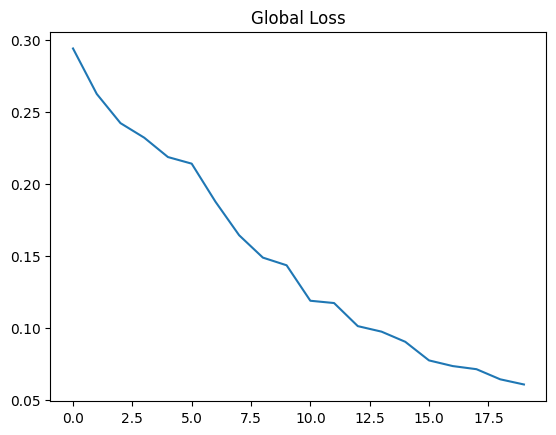

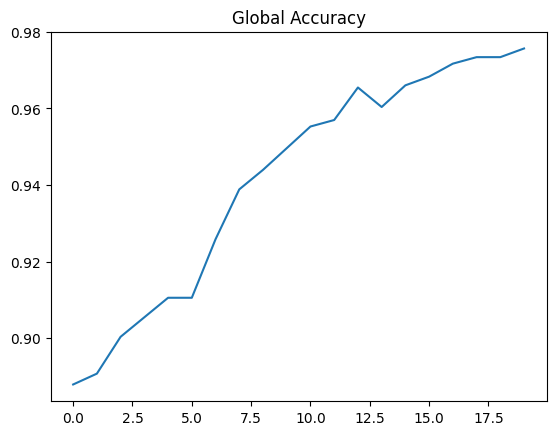

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, clone_model
from tensorflow.keras.layers import GRU, Dense, Bidirectional
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix

# -----------------------------
# 1. Split data into clients
# -----------------------------
def split_clients(X, y, n_clients=5):
    idx = np.arange(len(X)); np.random.shuffle(idx)
    return [(X[s], y[s]) for s in np.array_split(idx, n_clients)]

# -----------------------------
# 2. Build BiGRU model
# -----------------------------
def build_bigru(input_shape, n_classes):
    model = Sequential([
        Bidirectional(GRU(64, return_sequences=False), input_shape=input_shape),
        Dense(64, activation='relu'),
        Dense(n_classes, activation='softmax')
    ])
    model.compile(optimizer=Adam(0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# -----------------------------
# 3. FedAvg aggregation
# -----------------------------
def fedavg(global_model, local_models, sizes):
    total = np.sum(sizes)
    new_weights = [sum(w*s for w, s in zip(ws, sizes)) / total
                   for ws in zip(*[m.get_weights() for m in local_models])]
    global_model.set_weights(new_weights)
    return global_model

# -----------------------------
# 4. FedAvg training + metrics
# -----------------------------
def model_fedavg_bigru(xtrain, ytrain, xtest, ytest, n_clients=5, rounds=5, epochs=1):

    # Convert to NumPy arrays if needed
    xtrain = xtrain.to_numpy() if hasattr(xtrain, "to_numpy") else np.array(xtrain)
    xtest  = xtest.to_numpy()  if hasattr(xtest, "to_numpy") else np.array(xtest)
    ytrain = ytrain.to_numpy() if hasattr(ytrain, "to_numpy") else np.array(ytrain)
    ytest  = ytest.to_numpy()  if hasattr(ytest, "to_numpy") else np.array(ytest)

    # Reshape to 3D for GRU: (samples, timesteps, features)
    xtrain = xtrain.reshape(xtrain.shape[0], xtrain.shape[1], 1)
    xtest  = xtest.reshape(xtest.shape[0], xtest.shape[1], 1)

    clients = split_clients(xtrain, ytrain, n_clients)
    global_model = build_bigru(xtrain.shape[1:], len(np.unique(ytrain)))
    global_loss, global_acc = [], []

    for r in range(rounds):
        local_models, sizes = [], []
        for Xc, yc in clients:
            lm = clone_model(global_model)
            lm.set_weights(global_model.get_weights())
            lm.compile(Adam(0.001), 'sparse_categorical_crossentropy', ['accuracy'])
            lm.fit(Xc, yc, epochs=epochs, batch_size=32, verbose=0)
            local_models.append(lm)
            sizes.append(len(Xc))
        global_model = fedavg(global_model, local_models, sizes)
        loss, acc = global_model.evaluate(xtest, ytest, verbose=0)
        global_loss.append(loss); global_acc.append(acc)
        print(f"Round {r+1}: Loss={loss:.4f}, Accuracy={acc:.4f}")

    y_pred = np.argmax(global_model.predict(xtest, verbose=0), axis=1)
    print("\nClassification Report:\n", classification_report(ytest, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(ytest, y_pred))
    print("\nGlobal Loss per Round:", global_loss)
    print("Global Accuracy per Round:", global_acc)

    plt.figure(); plt.plot(global_loss); plt.title("Global Loss"); plt.show()
    plt.figure(); plt.plot(global_acc); plt.title("Global Accuracy"); plt.show()

    return global_model

# ------------------ CALL FUNCTION ------------------
global_model = model_fedavg_bigru(xtrain, ytrain, xtest, ytest, n_clients=4, rounds=20, epochs=2)


In [ ]:
Global_Loss_per_Round_BiGRU =  [0.29414448142051697, 0.26258131861686707, 0.2423136830329895, 0.2322174310684204, 0.21876779198646545, 0.21418502926826477, 0.1878146082162857, 0.1644773930311203, 0.14895543456077576, 0.14362666010856628, 0.1190057173371315, 0.11741319298744202, 0.10138817876577377, 0.09755723923444748, 0.09051401913166046, 0.07759396731853485, 0.07365730404853821, 0.07149538397789001, 0.0644705668091774, 0.060880374163389206]
Global_Accuracy_per_Round_BiGRU =  [0.8878822326660156, 0.8907134532928467, 0.9003397226333618, 0.9054360389709473, 0.9105322957038879, 0.9105322957038879, 0.92582106590271, 0.9388448596000671, 0.9439411163330078, 0.9496036171913147, 0.9552661180496216, 0.956964910030365, 0.9654586911201477, 0.9603623747825623, 0.9660249352455139, 0.9682899117469788, 0.9716874361038208, 0.9733861684799194, 0.9733861684799194, 0.975651204586029]

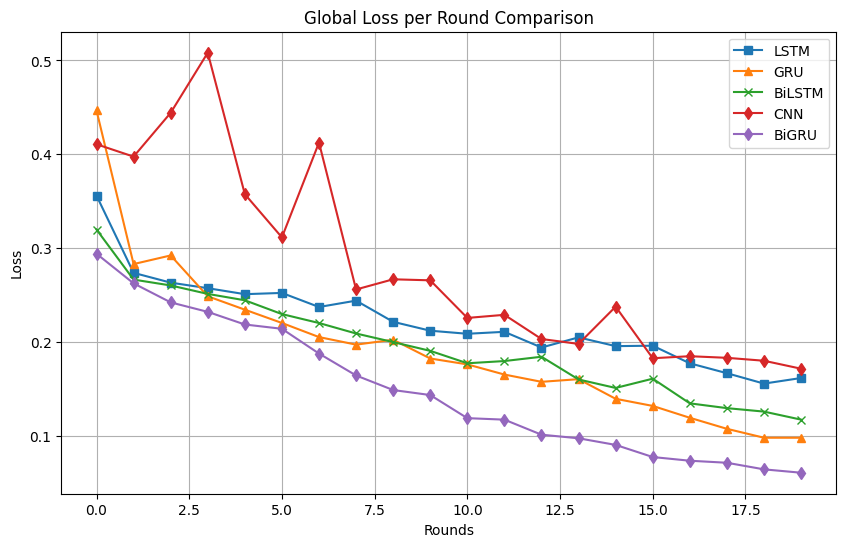

In [ ]:
import matplotlib.pyplot as plt


# Plot all in one figure
plt.figure(figsize=(10,6))
#plt.plot(Global_Loss_per_Round_BiGRU, marker='o', label='BiGRU')
plt.plot(Global_Loss_per_Round_LSTM, marker='s', label='LSTM')
plt.plot(Global_Loss_per_Round_GRU, marker='^', label='GRU')
plt.plot(Global_Loss_per_Round_BiLSTM, marker='x', label='BiLSTM')
plt.plot(Global_Loss_per_Round_CNN, marker='d', label='CNN')
plt.plot(Global_Loss_per_Round_BiGRU, marker='d', label='BiGRU')

plt.title("Global Loss per Round Comparison")
plt.xlabel("Rounds")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


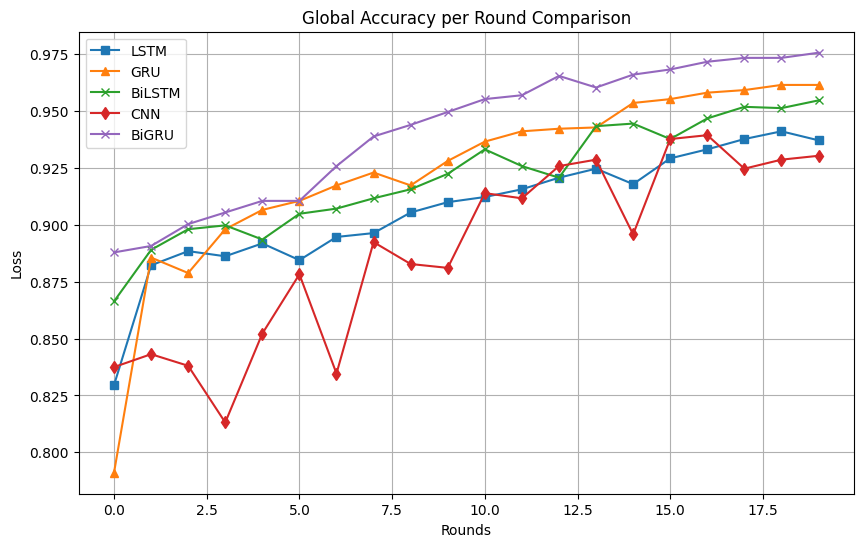

In [ ]:
import matplotlib.pyplot as plt


# Plot all in one figure
plt.figure(figsize=(10,6))
#plt.plot(Global_Loss_per_Round_BiGRU, marker='o', label='BiGRU')
plt.plot(Global_Accuracy_per_Round_LSTM, marker='s', label='LSTM')
plt.plot(Global_Accuracy_per_Round_GRU, marker='^', label='GRU')
plt.plot(Global_Accuracy_per_Round_BiLSTM, marker='x', label='BiLSTM')
plt.plot(Global_Accuracy_per_Round_CNN, marker='d', label='CNN')
plt.plot(Global_Accuracy_per_Round_BiGRU, marker='x', label='BiGRU')

plt.title("Global Accuracy per Round Comparison")
plt.xlabel("Rounds")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()
